# Applying Pretrained Deep Neural Networks for Image Classification
* Author: Johannes Maucher
* Last update: 04.11.2020

This notebook demonstrates the application of pretrained, publicable available neural networks in the task for which these nets have been trained - ImageNet object classification.


## Load the models from keras applications folder

In [1]:
import numpy as np
from tensorflow.keras.applications import vgg16, inception_v3, resnet50, mobilenet

In [2]:
vgg_model = vgg16.VGG16(weights='imagenet')
inception_model = inception_v3.InceptionV3(weights='imagenet')
resnet_model = resnet50.ResNet50(weights='imagenet')
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

2022-02-24 15:11:13.312837: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline


## Perform Pre-processing before feeding the image to the network

1. Keras loads the image using PIL library. This is done using the **load_img** function. The image is in $width \times height \times channels$ format.
2. Convert the image from PIL format to Numpy format ( $height \times width \times channels$ ) using **image_to_array** function.
3. Form a batch of image( s ) to feed the network. This is done using the **expand_dims** function in Numpy

In [4]:
filename = '../Data/cat.jpg'

<class 'PIL.Image.Image'>
PIL image size (224, 224)


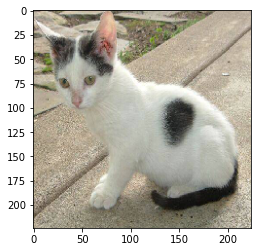

In [5]:
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print(type(original))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()

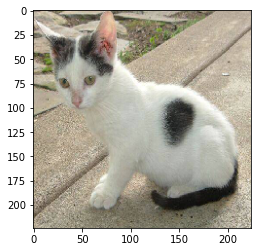

numpy array size (224, 224, 3)


In [6]:
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)

image batch size (1, 224, 224, 3)


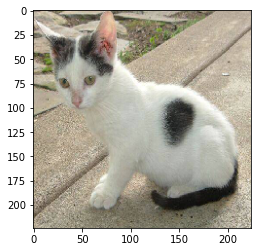

In [7]:
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

## Predictions using the various Networks

1. Preprocess the input by subtracting the mean value from each channel of the images in the batch. Mean is an array of three elements obtained by the average of R, G, B pixels of all images obtained from ImageNet
2. get the probabilities of occurrence for each class
3. convert the probabilities to human-readable labels

### VGG16 Network

In [8]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
#print(predictions)

In [9]:
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label_vgg = decode_predictions(predictions)
label_vgg

[[('n02123597', 'Siamese_cat', 0.30934194),
  ('n01877812', 'wallaby', 0.08034124),
  ('n02326432', 'hare', 0.07509843),
  ('n02325366', 'wood_rabbit', 0.0505307),
  ('n03223299', 'doormat', 0.048173614)]]

### ResNet50 Network

In [10]:
# prepare the image for the ResNet50 model
processed_image = resnet50.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = resnet_model.predict(processed_image)

# convert the probabilities to class labels
# If you want to see the top 3 predictions, specify it using the top argument
label_resnet = decode_predictions(predictions, top=3)
label_resnet

[[('n02124075', 'Egyptian_cat', 0.1573761),
  ('n03958227', 'plastic_bag', 0.14362858),
  ('n03223299', 'doormat', 0.14099436)]]

### MobileNet Network

In [11]:
# prepare the image for the MobileNet model
processed_image = mobilenet.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = mobilenet_model.predict(processed_image)

# convert the probabilities to imagenet class labels
label_mobilenet = decode_predictions(predictions)
label_mobilenet

[[('n03958227', 'plastic_bag', 0.15703683),
  ('n02124075', 'Egyptian_cat', 0.11697363),
  ('n02123597', 'Siamese_cat', 0.10532723),
  ('n02123045', 'tabby', 0.07564863),
  ('n02909870', 'bucket', 0.054681443)]]

### Inception_V3 Network

+ The input size for inception network is different from the other networks. It accepts inputs of size (299, 299).
+ Thus we load the image with target size according to that.

In [12]:
# load an image in PIL format
original = load_img(filename, target_size=(299, 299))

# Convert the PIL image into numpy array
numpy_image = img_to_array(original)

# reshape data in terms of batchsize
image_batch = np.expand_dims(numpy_image, axis=0)

# prepare the image for the Inception model
processed_image = inception_v3.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = inception_model.predict(processed_image)

# convert the probabilities to class labels
label_inception = decode_predictions(predictions)
label_inception

[[('n02124075', 'Egyptian_cat', 0.6622583),
  ('n02123045', 'tabby', 0.050285134),
  ('n02123597', 'Siamese_cat', 0.036381543),
  ('n02123159', 'tiger_cat', 0.023522463),
  ('n03223299', 'doormat', 0.015205721)]]

In [13]:
#!pip install opencv-python

In [14]:
import cv2
numpy_image = np.uint8(img_to_array(original)).copy()
numpy_image = cv2.resize(numpy_image,(900,900))

cv2.putText(numpy_image, "VGG16: {}, {:.2f}".format(label_vgg[0][0][1], label_vgg[0][0][2]) , (350, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "MobileNet: {}, {:.2f}".format(label_mobilenet[0][0][1], label_mobilenet[0][0][2]) , (350, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "Inception: {}, {:.2f}".format(label_inception[0][0][1], label_inception[0][0][2]) , (350, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "ResNet50: {}, {:.2f}".format(label_resnet[0][0][1], label_resnet[0][0][2]) , (350, 145), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
numpy_image = cv2.resize(numpy_image, (700,700))
cv2.imwrite("images/{}_output.jpg".format(filename.split('/')[-1].split('.')[0]),cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR))

ModuleNotFoundError: No module named 'cv2'

(-0.5, 699.5, 699.5, -0.5)

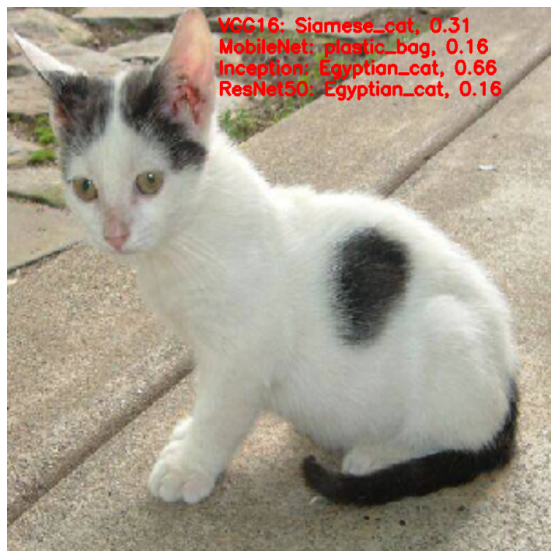

In [34]:
plt.figure(figsize=[10,10])
plt.imshow(numpy_image)
plt.axis('off')
